In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Node features

## Institution features

### Categories asked by Institutions

In [2]:
records = pd.read_csv('../data/clean_records.csv')
records.head()

,compiledRelease/buyer/id,compiledRelease/buyer/name,compiledRelease/tender/mainProcurementCategoryDetails,compiledRelease/id,Year
0,DNCP-SICP-CODE-230,Universidad Nacional del Este (UNE),Bienes - Muebles y Enseres,250244-1359374727,2013
1,DNCP-SICP-CODE-226,Universidad Nacional de Asunción (UNA),"Bienes - Equipos, accesorios y programas compu...",251766-1359556851,2013
2,DNCP-SICP-CODE-226,Universidad Nacional de Asunción (UNA),"Bienes - Equipos, accesorios y programas compu...",251771-1359556983,2013
3,DNCP-SICP-CODE-127,Municipalidad de Alto Verá,"Obras - Construcción, Restauración, Reconstruc...",250299-1359041463,2013
4,DNCP-SICP-CODE-63,Municipalidad de Yguazú,"Bienes - Maquinarias, Equipos y herramientas m...",250360-1358779861,2013


In [3]:
categories = pd.read_excel('../data/categories.xlsx', sheet_name='Categorías')
categories.head()

,ID,Nombre limpio,compiledRelease/tender/mainProcurementCategoryDetails,Categories
0,Cat1,Adquisición y Locación de inmuebles. Alquiler ...,Bienes - Adquisición y Locación de inmuebles. ...,484
1,Cat1,Adquisición y Locación de inmuebles. Alquiler ...,Locación Inmuebles - Adquisición y Locación de...,3968
2,Cat1,Adquisición y Locación de inmuebles. Alquiler ...,Locación Muebles - Adquisición y Locación de i...,741
3,Cat1,Adquisición y Locación de inmuebles. Alquiler ...,Servicios - Adquisición y Locación de inmueble...,775
4,Cat1,Adquisición y Locación de inmuebles. Alquiler ...,Tierras - Adquisición y Locación de inmuebles....,584


In [4]:
records = records.merge(categories[['ID', 'compiledRelease/tender/mainProcurementCategoryDetails', 'Nombre limpio']], 
              on='compiledRelease/tender/mainProcurementCategoryDetails')
records.drop(['compiledRelease/tender/mainProcurementCategoryDetails'], inplace = True, axis=1)
records.rename({'ID':'ID_cat', 'Nombre limpio':'Nombre Categoría'}, axis=1, inplace=True)

In [5]:
records = records[['compiledRelease/buyer/id', 'compiledRelease/buyer/name', 'ID_cat', 'Nombre Categoría']]
records.drop_duplicates(records.columns, inplace=True)
records.head()

,compiledRelease/buyer/id,compiledRelease/buyer/name,ID_cat,Nombre Categoría
0,DNCP-SICP-CODE-230,Universidad Nacional del Este (UNE),Cat14,Muebles y Enseres
1,DNCP-SICP-CODE-176,Municipalidad de Obligado,Cat14,Muebles y Enseres
2,DNCP-SICP-CODE-331,Municipalidad de Carmelo Peralta,Cat14,Muebles y Enseres
3,DNCP-SICP-CODE-305,Ministerio de Hacienda,Cat14,Muebles y Enseres
4,DNCP-SICP-CODE-127,Municipalidad de Alto Verá,Cat14,Muebles y Enseres


In [6]:
records.to_csv('../data/category_vs_institution.csv', index=False)

## Suppliers features

### Categories of products provided by the Suppliers

In [7]:
records = pd.read_csv('../data/clean_records.csv')
records.head()

,compiledRelease/buyer/id,compiledRelease/buyer/name,compiledRelease/tender/mainProcurementCategoryDetails,compiledRelease/id,Year
0,DNCP-SICP-CODE-230,Universidad Nacional del Este (UNE),Bienes - Muebles y Enseres,250244-1359374727,2013
1,DNCP-SICP-CODE-226,Universidad Nacional de Asunción (UNA),"Bienes - Equipos, accesorios y programas compu...",251766-1359556851,2013
2,DNCP-SICP-CODE-226,Universidad Nacional de Asunción (UNA),"Bienes - Equipos, accesorios y programas compu...",251771-1359556983,2013
3,DNCP-SICP-CODE-127,Municipalidad de Alto Verá,"Obras - Construcción, Restauración, Reconstruc...",250299-1359041463,2013
4,DNCP-SICP-CODE-63,Municipalidad de Yguazú,"Bienes - Maquinarias, Equipos y herramientas m...",250360-1358779861,2013


In [8]:
categories = pd.read_excel('../data/categories.xlsx', sheet_name='Categorías')
categories.head()

,ID,Nombre limpio,compiledRelease/tender/mainProcurementCategoryDetails,Categories
0,Cat1,Adquisición y Locación de inmuebles. Alquiler ...,Bienes - Adquisición y Locación de inmuebles. ...,484
1,Cat1,Adquisición y Locación de inmuebles. Alquiler ...,Locación Inmuebles - Adquisición y Locación de...,3968
2,Cat1,Adquisición y Locación de inmuebles. Alquiler ...,Locación Muebles - Adquisición y Locación de i...,741
3,Cat1,Adquisición y Locación de inmuebles. Alquiler ...,Servicios - Adquisición y Locación de inmueble...,775
4,Cat1,Adquisición y Locación de inmuebles. Alquiler ...,Tierras - Adquisición y Locación de inmuebles....,584


In [9]:
records = records.merge(categories[['ID', 'compiledRelease/tender/mainProcurementCategoryDetails', 'Nombre limpio']], 
              on='compiledRelease/tender/mainProcurementCategoryDetails')
records.drop(['compiledRelease/tender/mainProcurementCategoryDetails'], inplace = True, axis=1)
records.rename({'ID':'ID_cat', 'Nombre limpio':'Nombre Categoría'}, axis=1, inplace=True)

In [10]:
records.head()

,compiledRelease/buyer/id,compiledRelease/buyer/name,compiledRelease/id,Year,ID_cat,Nombre Categoría
0,DNCP-SICP-CODE-230,Universidad Nacional del Este (UNE),250244-1359374727,2013,Cat14,Muebles y Enseres
1,DNCP-SICP-CODE-176,Municipalidad de Obligado,250435-1358946130,2013,Cat14,Muebles y Enseres
2,DNCP-SICP-CODE-331,Municipalidad de Carmelo Peralta,251210-1359109561,2013,Cat14,Muebles y Enseres
3,DNCP-SICP-CODE-305,Ministerio de Hacienda,249624-1358842065,2013,Cat14,Muebles y Enseres
4,DNCP-SICP-CODE-127,Municipalidad de Alto Verá,250278-1358849340,2013,Cat14,Muebles y Enseres


In [11]:
suppliers = pd.read_csv('../data/clean_suppliers.csv')
suppliers.head()

,compiledRelease/awards/0/suppliers/0/id,compiledRelease/awards/0/suppliers/0/name,compiledRelease/awards/0/id,compiledRelease/id,Paraguayan,Year
0,PY-RUC-80012330-1,B.BRAUN MEDICAL PARAGUAY S.A.,245280-b-braun-medical-paraguay-s-a-37,245280-lpn-06-12-adquisicion-insumos-regiones-...,True,2013
1,PY-RUC-80030030-0,CATETERES Y AFINES S.A.,245280-cateteres-afines-s-a-35,245280-lpn-06-12-adquisicion-insumos-regiones-...,True,2013
2,PY-RUC-80026564-5,CHACO INTERNACIONAL SA,245280-chaco-internacional-sa-26,245280-lpn-06-12-adquisicion-insumos-regiones-...,True,2013
3,PY-RUC-80000173-7,CODEX S.R.L.,245280-codex-s-r-l-32,245280-lpn-06-12-adquisicion-insumos-regiones-...,True,2013
4,PY-RUC-80025797-9,D & D DISTRIBUIDORA SA,245280-d-d-distribuidora-sa-33,245280-lpn-06-12-adquisicion-insumos-regiones-...,True,2013


In [12]:
suppliers_cat = suppliers.merge(records[['compiledRelease/id', 'ID_cat', 'Nombre Categoría']], on=['compiledRelease/id'])
suppliers_cat.drop(['compiledRelease/awards/0/id', 'Paraguayan', 'Year', 'compiledRelease/id'], axis=1, inplace=True)
suppliers_cat.drop_duplicates(suppliers_cat.columns, inplace=True)
suppliers_cat.shape

(24593, 4)

In [92]:
suppliers_cat.to_csv('../data/category_vs_supplier.csv', index=False)

### Type of Institutions to Suppliers

In [13]:
institutions = pd.read_excel('../data/instituciones.xlsx')

In [14]:
institutions.head()

,Institution,Category,Inst_id
0,Universidad Nacional del Este (UNE),University,DNCP-SICP-CODE-230
1,Municipalidad de Obligado,Municipality,DNCP-SICP-CODE-176
2,Municipalidad de Carmelo Peralta,Municipality,DNCP-SICP-CODE-331
3,Ministerio de Hacienda,Ministry,DNCP-SICP-CODE-305
4,Municipalidad de Alto Verá,Municipality,DNCP-SICP-CODE-127


In [15]:
records = pd.read_csv('../data/clean_records.csv')
records = records[['compiledRelease/buyer/id', 'compiledRelease/id']]

In [16]:
records.head()

,compiledRelease/buyer/id,compiledRelease/id
0,DNCP-SICP-CODE-230,250244-1359374727
1,DNCP-SICP-CODE-176,250435-1358946130
2,DNCP-SICP-CODE-331,251210-1359109561
3,DNCP-SICP-CODE-305,249624-1358842065
4,DNCP-SICP-CODE-127,250278-1358849340


In [17]:
institutions = institutions.merge(records, left_on='Inst_id', right_on='compiledRelease/buyer/id')
institutions.head()

,Institution,Category,Inst_id,compiledRelease/buyer/id,compiledRelease/id
0,Universidad Nacional del Este (UNE),University,DNCP-SICP-CODE-230,DNCP-SICP-CODE-230,250244-1359374727
1,Universidad Nacional del Este (UNE),University,DNCP-SICP-CODE-230,DNCP-SICP-CODE-230,214005-1362471899
2,Universidad Nacional del Este (UNE),University,DNCP-SICP-CODE-230,DNCP-SICP-CODE-230,185893-adquisicion-muebles-enseres-1362471899
3,Universidad Nacional del Este (UNE),University,DNCP-SICP-CODE-230,DNCP-SICP-CODE-230,192227-adquisicion-alfombras-1362471899
4,Universidad Nacional del Este (UNE),University,DNCP-SICP-CODE-230,DNCP-SICP-CODE-230,196423-adquisicion-equipamientos-sala-laborato...


In [18]:
institutions.drop(['Inst_id'], axis=1, inplace=True)

In [19]:
institutions.head()

,Institution,Category,compiledRelease/buyer/id,compiledRelease/id
0,Universidad Nacional del Este (UNE),University,DNCP-SICP-CODE-230,250244-1359374727
1,Universidad Nacional del Este (UNE),University,DNCP-SICP-CODE-230,214005-1362471899
2,Universidad Nacional del Este (UNE),University,DNCP-SICP-CODE-230,185893-adquisicion-muebles-enseres-1362471899
3,Universidad Nacional del Este (UNE),University,DNCP-SICP-CODE-230,192227-adquisicion-alfombras-1362471899
4,Universidad Nacional del Este (UNE),University,DNCP-SICP-CODE-230,196423-adquisicion-equipamientos-sala-laborato...


In [20]:
suppliers = pd.read_csv('../data/clean_suppliers.csv')

In [21]:
suppliers = suppliers[['compiledRelease/id', 'compiledRelease/awards/0/suppliers/0/name', 'compiledRelease/awards/0/suppliers/0/id']]
suppliers.head()

,compiledRelease/id,compiledRelease/awards/0/suppliers/0/name,compiledRelease/awards/0/suppliers/0/id
0,245280-lpn-06-12-adquisicion-insumos-regiones-...,B.BRAUN MEDICAL PARAGUAY S.A.,PY-RUC-80012330-1
1,245280-lpn-06-12-adquisicion-insumos-regiones-...,CATETERES Y AFINES S.A.,PY-RUC-80030030-0
2,245280-lpn-06-12-adquisicion-insumos-regiones-...,CHACO INTERNACIONAL SA,PY-RUC-80026564-5
3,245280-lpn-06-12-adquisicion-insumos-regiones-...,CODEX S.R.L.,PY-RUC-80000173-7
4,245280-lpn-06-12-adquisicion-insumos-regiones-...,D & D DISTRIBUIDORA SA,PY-RUC-80025797-9


In [22]:
institutions = institutions.merge(suppliers, on='compiledRelease/id')
institutions.drop(['Institution', 'compiledRelease/buyer/id', 'compiledRelease/id'],
                  axis=1, inplace=True)
institutions.head()

,Category,compiledRelease/awards/0/suppliers/0/name,compiledRelease/awards/0/suppliers/0/id
0,University,BERTA DOLORES AYALA FERREIRA,PY-RUC-249001-3
1,University,Dario Hugo Delgado,PY-RUC-990393-3
2,University,P.M.Y A. S.A.,PY-RUC-80045130-9
3,University,JORGE DANIEL AQUINO DUARTE,PY-RUC-614988-0
4,University,BERTA DOLORES AYALA FERREIRA,PY-RUC-249001-3


In [23]:
institutions.drop_duplicates(['Category', 'compiledRelease/awards/0/suppliers/0/name', 'compiledRelease/awards/0/suppliers/0/id'], 
                             inplace=True)

In [24]:
institutions.head()

,Category,compiledRelease/awards/0/suppliers/0/name,compiledRelease/awards/0/suppliers/0/id
0,University,BERTA DOLORES AYALA FERREIRA,PY-RUC-249001-3
1,University,Dario Hugo Delgado,PY-RUC-990393-3
2,University,P.M.Y A. S.A.,PY-RUC-80045130-9
3,University,JORGE DANIEL AQUINO DUARTE,PY-RUC-614988-0
6,University,RAMON ISMAEL GAMARRA ESPINOLA,PY-RUC-3268270-0


In [25]:
institutions.sort_values('compiledRelease/awards/0/suppliers/0/id')

,Category,compiledRelease/awards/0/suppliers/0/name,compiledRelease/awards/0/suppliers/0/id
123580,Municipality,PURIFICACION MOREL ALFONSO,PY-RUC-1001174-9
120099,Municipality,ALCIDES ESPINOLA VILLAGRA,PY-RUC-1001336-9
173829,Municipality,Francisco Solano Huerta Etcheverry,PY-RUC-1001434-9
62215,Ministry,RAMON LEOPOLDO SALVIONI GONZALEZ,PY-RUC-1001661-9
67291,Descentralized Administration,RAMON LEOPOLDO SALVIONI GONZALEZ,PY-RUC-1001661-9
...,...,...,...
87254,Judicial Branch,"ROLON SOSA, CEFERINO *",PY-RUC-X-15826
87218,Judicial Branch,BENITEZ VDA. DE FRANCO JUSTINA,PY-RUC-X-15951
87226,Judicial Branch,LEGUIZAMON AQUINO MARIA ROSANA,PY-RUC-X-16340
87242,Judicial Branch,DOMINGA ORUE,PY-RUC-X-16486


In [29]:
institutions.to_csv('../data/type_inst_vs_supplier.csv', index=False)

# Edges info

## Edges creation

In [26]:
awards = pd.read_csv('../data/clean_awards.csv')

In [27]:
awards.head()

,compiledRelease/awards/0/statusDetails,compiledRelease/awards/0/value/amount,compiledRelease/awards/0/value/currency,compiledRelease/awards/0/id,compiledRelease/id,Year
0,Adjudicado,416301530.0,PYG,245280-b-braun-medical-paraguay-s-a-37,245280-lpn-06-12-adquisicion-insumos-regiones-...,2013
1,Adjudicado,123052000.0,PYG,245280-cateteres-afines-s-a-35,245280-lpn-06-12-adquisicion-insumos-regiones-...,2013
2,Adjudicado,944559860.0,PYG,245280-chaco-internacional-sa-26,245280-lpn-06-12-adquisicion-insumos-regiones-...,2013
3,Adjudicado,218202620.0,PYG,245280-codex-s-r-l-32,245280-lpn-06-12-adquisicion-insumos-regiones-...,2013
4,Adjudicado,10965400.0,PYG,245280-d-d-distribuidora-sa-33,245280-lpn-06-12-adquisicion-insumos-regiones-...,2013


In [28]:
awards['compiledRelease/id'].value_counts()

280116-contrataciones-marco-programa-almuerzo-escolar-1417186849                                 272
282839-contrataciones-marco-programa-almuerzo-escolar-1417195869                                 201
279624-contrataciones-marco-programa-almuerzo-escolar-gobernacion-misiones-1406109228            191
189985-alquiler-inmuebles-estacionamientos-1362471899                                            115
295659-cursos-capacitacion-laboral-1-1442496346                                                  111
                                                                                                ... 
324706-servicio-recarga-extintores-fuego-1-1493312353                                              1
323968-provision-agua-mineral-ad-referendum-1-1492791614                                           1
323426-seguro-vehiculos-1-1493045600.11243                                                         1
325989-adquisicion-equipos-informaticos-1-1493399645.395969                                

In [29]:
awards = awards[['compiledRelease/awards/0/value/amount', 'compiledRelease/awards/0/id', 'compiledRelease/id']]
awards.head()

,compiledRelease/awards/0/value/amount,compiledRelease/awards/0/id,compiledRelease/id
0,416301530.0,245280-b-braun-medical-paraguay-s-a-37,245280-lpn-06-12-adquisicion-insumos-regiones-...
1,123052000.0,245280-cateteres-afines-s-a-35,245280-lpn-06-12-adquisicion-insumos-regiones-...
2,944559860.0,245280-chaco-internacional-sa-26,245280-lpn-06-12-adquisicion-insumos-regiones-...
3,218202620.0,245280-codex-s-r-l-32,245280-lpn-06-12-adquisicion-insumos-regiones-...
4,10965400.0,245280-d-d-distribuidora-sa-33,245280-lpn-06-12-adquisicion-insumos-regiones-...


In [31]:
records = pd.read_csv('../data/clean_records.csv')
records.head()

,compiledRelease/buyer/id,compiledRelease/buyer/name,compiledRelease/tender/mainProcurementCategoryDetails,compiledRelease/id,Year
0,DNCP-SICP-CODE-230,Universidad Nacional del Este (UNE),Bienes - Muebles y Enseres,250244-1359374727,2013
1,DNCP-SICP-CODE-226,Universidad Nacional de Asunción (UNA),"Bienes - Equipos, accesorios y programas compu...",251766-1359556851,2013
2,DNCP-SICP-CODE-226,Universidad Nacional de Asunción (UNA),"Bienes - Equipos, accesorios y programas compu...",251771-1359556983,2013
3,DNCP-SICP-CODE-127,Municipalidad de Alto Verá,"Obras - Construcción, Restauración, Reconstruc...",250299-1359041463,2013
4,DNCP-SICP-CODE-63,Municipalidad de Yguazú,"Bienes - Maquinarias, Equipos y herramientas m...",250360-1358779861,2013


In [32]:
records = records[['compiledRelease/buyer/id', 'compiledRelease/id']]
records.head()

,compiledRelease/buyer/id,compiledRelease/id
0,DNCP-SICP-CODE-230,250244-1359374727
1,DNCP-SICP-CODE-226,251766-1359556851
2,DNCP-SICP-CODE-226,251771-1359556983
3,DNCP-SICP-CODE-127,250299-1359041463
4,DNCP-SICP-CODE-63,250360-1358779861


In [33]:
suppliers = pd.read_csv('../data/clean_suppliers.csv')

In [34]:
suppliers.head()

,compiledRelease/awards/0/suppliers/0/id,compiledRelease/awards/0/suppliers/0/name,compiledRelease/awards/0/id,compiledRelease/id,Paraguayan,Year
0,PY-RUC-80012330-1,B.BRAUN MEDICAL PARAGUAY S.A.,245280-b-braun-medical-paraguay-s-a-37,245280-lpn-06-12-adquisicion-insumos-regiones-...,True,2013
1,PY-RUC-80030030-0,CATETERES Y AFINES S.A.,245280-cateteres-afines-s-a-35,245280-lpn-06-12-adquisicion-insumos-regiones-...,True,2013
2,PY-RUC-80026564-5,CHACO INTERNACIONAL SA,245280-chaco-internacional-sa-26,245280-lpn-06-12-adquisicion-insumos-regiones-...,True,2013
3,PY-RUC-80000173-7,CODEX S.R.L.,245280-codex-s-r-l-32,245280-lpn-06-12-adquisicion-insumos-regiones-...,True,2013
4,PY-RUC-80025797-9,D & D DISTRIBUIDORA SA,245280-d-d-distribuidora-sa-33,245280-lpn-06-12-adquisicion-insumos-regiones-...,True,2013


In [35]:
suppliers = suppliers[['compiledRelease/awards/0/suppliers/0/id', 'compiledRelease/awards/0/id', 'compiledRelease/id']]
suppliers.head()

,compiledRelease/awards/0/suppliers/0/id,compiledRelease/awards/0/id,compiledRelease/id
0,PY-RUC-80012330-1,245280-b-braun-medical-paraguay-s-a-37,245280-lpn-06-12-adquisicion-insumos-regiones-...
1,PY-RUC-80030030-0,245280-cateteres-afines-s-a-35,245280-lpn-06-12-adquisicion-insumos-regiones-...
2,PY-RUC-80026564-5,245280-chaco-internacional-sa-26,245280-lpn-06-12-adquisicion-insumos-regiones-...
3,PY-RUC-80000173-7,245280-codex-s-r-l-32,245280-lpn-06-12-adquisicion-insumos-regiones-...
4,PY-RUC-80025797-9,245280-d-d-distribuidora-sa-33,245280-lpn-06-12-adquisicion-insumos-regiones-...


In [36]:
edges_data = awards.merge(records, on='compiledRelease/id')
edges_data = edges_data.merge(suppliers, on=['compiledRelease/awards/0/id', 'compiledRelease/id'])
edges_data.drop(['compiledRelease/awards/0/id', 'compiledRelease/id'], axis=1, inplace=True)

In [37]:
edges_data.head()

,compiledRelease/awards/0/value/amount,compiledRelease/buyer/id,compiledRelease/awards/0/suppliers/0/id
0,416301530.0,DNCP-SICP-CODE-306,PY-RUC-80012330-1
1,123052000.0,DNCP-SICP-CODE-306,PY-RUC-80030030-0
2,944559860.0,DNCP-SICP-CODE-306,PY-RUC-80026564-5
3,218202620.0,DNCP-SICP-CODE-306,PY-RUC-80000173-7
4,10965400.0,DNCP-SICP-CODE-306,PY-RUC-80025797-9


In [38]:
edges_data = pd.pivot_table(edges_data, index=['compiledRelease/awards/0/suppliers/0/id', 'compiledRelease/buyer/id'],
                values='compiledRelease/awards/0/value/amount', aggfunc='sum')

In [39]:
edges_data.shape

(50493, 1)

In [40]:
edges_data.reset_index(inplace=True)

In [41]:
edges_data.head()

,compiledRelease/awards/0/suppliers/0/id,compiledRelease/buyer/id,compiledRelease/awards/0/value/amount
0,PY-RUC-1001174-9,DNCP-SICP-CODE-3,139995750.0
1,PY-RUC-1001336-9,DNCP-SICP-CODE-238,61653300.0
2,PY-RUC-1001336-9,DNCP-SICP-CODE-27,244811100.0
3,PY-RUC-1001336-9,DNCP-SICP-CODE-273,155745200.0
4,PY-RUC-1001434-9,DNCP-SICP-CODE-329,144000000.0


In [42]:
supplier_number = pd.DataFrame(edges_data['compiledRelease/awards/0/suppliers/0/id'].value_counts()).reset_index()
supplier_number.rename({'compiledRelease/awards/0/suppliers/0/id':'count'}, axis=1, inplace=True)
supplier_number.head()

,index,count
0,PY-RUC-80013889-9,121
1,PY-RUC-80002612-8,113
2,PY-RUC-80002592-0,106
3,PY-RUC-80002756-6,105
4,PY-RUC-80003251-9,101


In [43]:
def bins_make(x):
    bins = [5,10,25,50,100]
    if x<bins[0]:
        return '2 to 5'
    elif x>=bins[0] and x<bins[1]:
        return '5 to 10'
    elif x>=bins[1] and x<bins[2]:
        return '10 to 25'
    elif x>=bins[2] and x<bins[3]:
        return '25 to 50'
    elif x>=bins[3] and x<bins[4]:
        return '50 to 100'
    else:
        return '>100'

supplier_number['bin'] = supplier_number['count'].map(bins_make)

In [44]:
supplier_number.shape

(15911, 3)

In [45]:
supplier_number['bin'].value_counts()

2 to 5       13777
5 to 10       1057
10 to 25       751
25 to 50       250
50 to 100       70
>100             6
Name: bin, dtype: int64

In [47]:
supplier_1 = supplier_number[supplier_number['count']>1]
supplier_1.shape

(5190, 3)

In [48]:
supplier_1.head()

,index,count,bin
0,PY-RUC-80013889-9,121,>100
1,PY-RUC-80002612-8,113,>100
2,PY-RUC-80002592-0,106,>100
3,PY-RUC-80002756-6,105,>100
4,PY-RUC-80003251-9,101,>100


In [49]:
val_count = supplier_1['bin'].value_counts()

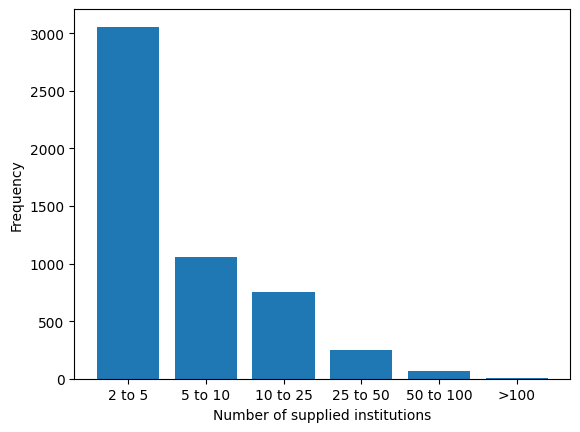

In [50]:
plt.bar(val_count.index, val_count, align='center')
#plt.xticks(rotation=90)
plt.xlabel('Number of supplied institutions')
plt.ylabel('Frequency')
plt.show()

In [51]:
institution_number = len(edges_data['compiledRelease/buyer/id'].unique())
institution_number

375

In [52]:
edges_data['compiledRelease/buyer/id'].value_counts().reset_index()

,index,compiledRelease/buyer/id
0,DNCP-SICP-CODE-306,1961
1,DNCP-SICP-CODE-301,1604
2,DNCP-SICP-CODE-226,1477
3,DNCP-SICP-CODE-21,1471
4,DNCP-SICP-CODE-304,1131
...,...,...
370,DNCP-SICP-CODE-387,1
371,DNCP-SICP-CODE-385,1
372,DNCP-SICP-CODE-382,1
373,DNCP-SICP-CODE-384,1


In [53]:
edges_data

,compiledRelease/awards/0/suppliers/0/id,compiledRelease/buyer/id,compiledRelease/awards/0/value/amount
0,PY-RUC-1001174-9,DNCP-SICP-CODE-3,139995750.0
1,PY-RUC-1001336-9,DNCP-SICP-CODE-238,61653300.0
2,PY-RUC-1001336-9,DNCP-SICP-CODE-27,244811100.0
3,PY-RUC-1001336-9,DNCP-SICP-CODE-273,155745200.0
4,PY-RUC-1001434-9,DNCP-SICP-CODE-329,144000000.0
...,...,...,...
50488,PY-RUC-X-15826,DNCP-SICP-CODE-21,36800000.0
50489,PY-RUC-X-15951,DNCP-SICP-CODE-21,45200000.0
50490,PY-RUC-X-16340,DNCP-SICP-CODE-21,8000000.0
50491,PY-RUC-X-16486,DNCP-SICP-CODE-21,15200000.0


In [54]:
supplier_1.rename({'index':'compiledRelease/awards/0/suppliers/0/id'}, axis=1, inplace=True)

/var/folders/_6/l3fpk3z10lb5g2csy8ykd4lw0000gn/T/ipykernel_82375/75142630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supplier_1.rename({'index':'compiledRelease/awards/0/suppliers/0/id'}, axis=1, inplace=True)


In [55]:
institution_1 = edges_data.merge(supplier_1, on='compiledRelease/awards/0/suppliers/0/id')
institution_1.drop(['compiledRelease/awards/0/suppliers/0/id', 'compiledRelease/awards/0/value/amount'],
                    axis=1, inplace=True)
institution_1 = pd.pivot_table(institution_1, index=['compiledRelease/buyer/id'], values=['count'], 
                aggfunc='count').sort_values('count', ascending=False).reset_index()
institution_1.shape

(374, 2)

In [56]:
institution_1.head()

,compiledRelease/buyer/id,count
0,DNCP-SICP-CODE-306,1591
1,DNCP-SICP-CODE-301,1346
2,DNCP-SICP-CODE-226,1324
3,DNCP-SICP-CODE-304,1009
4,DNCP-SICP-CODE-21,956


In [58]:
def bins_make(x):
    bins = [10,50,100,250,500]
    if x<bins[0]:
        return '1 to 10'
    elif x>=bins[0] and x<bins[1]:
        return '10 to 50'
    elif x>=bins[1] and x<bins[2]:
        return '50 to 100'
    elif x>=bins[2] and x<bins[3]:
        return '100 to 250'
    elif x>=bins[3] and x<bins[4]:
        return '250 to 500'
    else:
        return '>500'

institution_1['bin'] = institution_1['count'].map(bins_make)
val_count = institution_1['bin'].value_counts()

val_index = ['1 to 10', '10 to 50', '50 to 100', '100 to 250', '250 to 500', '>500']
val_count = [val_count[idx] for idx in val_index]

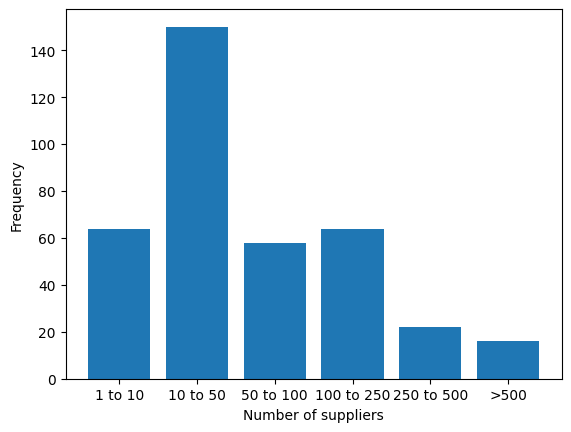

In [59]:
plt.bar(val_index, val_count, align='center')
#plt.xticks(rotation=90)
plt.xlabel('Number of suppliers')
plt.ylabel('Frequency')
plt.show()

## Indexing Nodes

In [60]:
index_supp = edges_data[['compiledRelease/awards/0/suppliers/0/id']].drop_duplicates('compiledRelease/awards/0/suppliers/0/id')
index_supp['Node Type'] = ['supplier'] * index_supp.shape[0]
index_supp.rename({'compiledRelease/awards/0/suppliers/0/id': 'Node name'}, axis=1, inplace=True)
index_supp.head()

,Node name,Node Type
0,PY-RUC-1001174-9,supplier
1,PY-RUC-1001336-9,supplier
4,PY-RUC-1001434-9,supplier
5,PY-RUC-1001661-9,supplier
12,PY-RUC-1001746-1,supplier


In [61]:
index_inst = edges_data[['compiledRelease/buyer/id']].drop_duplicates('compiledRelease/buyer/id')
index_inst['Node Type'] = ['institution'] * index_inst.shape[0]
index_inst.rename({'compiledRelease/buyer/id': 'Node name'}, axis=1, inplace=True)
index_inst.head()

,Node name,Node Type
0,DNCP-SICP-CODE-3,institution
1,DNCP-SICP-CODE-238,institution
2,DNCP-SICP-CODE-27,institution
3,DNCP-SICP-CODE-273,institution
4,DNCP-SICP-CODE-329,institution


In [62]:
idx_node = pd.concat([index_inst, index_supp], ignore_index=True)
idx_node['Node id'] = list(range(idx_node.shape[0]))
idx_node = idx_node[['Node id', 'Node name', 'Node Type']]
idx_node.head()

,Node id,Node name,Node Type
0,0,DNCP-SICP-CODE-3,institution
1,1,DNCP-SICP-CODE-238,institution
2,2,DNCP-SICP-CODE-27,institution
3,3,DNCP-SICP-CODE-273,institution
4,4,DNCP-SICP-CODE-329,institution


In [306]:
idx_node.to_csv('../data/Whole graph/node_idx.csv', index=False)

In [285]:
idx_node.head()

,Node id,Node name,Node Type
0,0,DNCP-SICP-CODE-3,institution
1,1,DNCP-SICP-CODE-238,institution
2,2,DNCP-SICP-CODE-27,institution
3,3,DNCP-SICP-CODE-273,institution
4,4,DNCP-SICP-CODE-329,institution


## Built edges

#### Whole Graph

In [286]:
node2idx = {}
idx2node = {}
for idx, nod_name in enumerate(idx_node['Node name']):
    node2idx[nod_name] = idx
    idx2node[idx] = nod_name

In [288]:
def edge_idx(df):
    sup = node2idx[df["compiledRelease/awards/0/suppliers/0/id"]]
    buy = node2idx[df["compiledRelease/buyer/id"]]
    return (buy, sup)

In [304]:
edges_data['Edge Rep'] = edges_data.apply(edge_idx, axis=1)
edges_data = edges_data[['compiledRelease/buyer/id','compiledRelease/awards/0/suppliers/0/id',
                        'compiledRelease/awards/0/value/amount', 'Edge Rep']]


In [307]:
edges_data.to_csv('../data/Whole graph/edge_data.csv', index=False)

##### Visualization

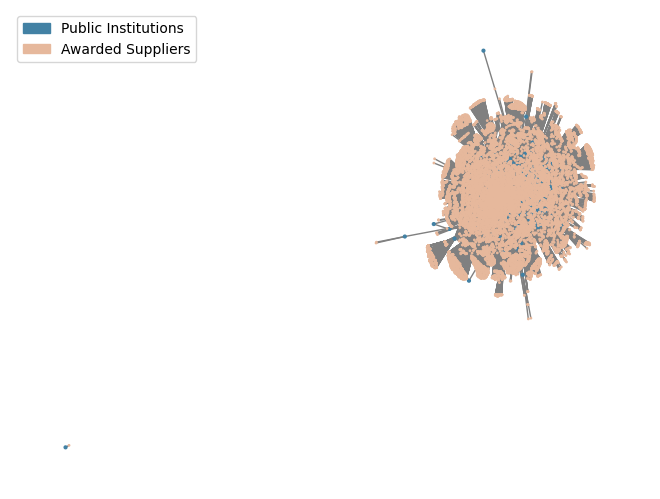

In [293]:
#Plot - Whole Graph

# Create a bipartite graph
G = nx.Graph()

nodes = list(range(len(node2idx)))

# Example bipartite node sets
nodes_set_A = nodes[:index_inst.shape[0]] #instituciones
nodes_set_B = nodes[index_inst.shape[0]:] #proveedores

# Add nodes to the graph with 'bipartite' attribute
G.add_nodes_from(nodes_set_A, bipartite=0)  # bipartite=0 for nodes in set A
G.add_nodes_from(nodes_set_B, bipartite=1)  # bipartite=1 for nodes in set B

# Add edges between nodes in different sets
edges = edges_data['Edge Rep'].to_list()
G.add_edges_from(edges)

# Create dictionaries to specify node sizes for each partition
node_sizes_A = {node: 4 for node in nodes_set_A}

# Create dictionaries to specify colors for nodes in each partition
node_colors = {node: '#4281A4' for node in nodes_set_A}
node_colors.update({node: '#E6B89C' for node in nodes_set_B})

# Create a dictionary to specify colors for edges
edge_colors = {edge: 'gray' for edge in G.edges()}

# Visualize the bipartite graph
pos = nx.spring_layout(G, seed=42)

# Extract lists of sizes and colors for nodes and edges based on the dictionaries
node_sizes_list = [node_sizes_A.get(node, 1) for node in G.nodes()]
node_colors_list = [node_colors[node] for node in G.nodes()]
edge_colors_list = [edge_colors[edge] for edge in G.edges()]

# Draw the graph with specified node and edge colors
nx.draw(G, pos, node_color=node_colors_list, edge_color=edge_colors_list, node_size=node_sizes_list)

# Create legend patches for node colors
legend_patches = [
    mpatches.Patch(color='#4281A4', label='Public Institutions'),
    mpatches.Patch(color='#E6B89C', label='Awarded Suppliers'),
]

# Add the legend to the plot
plt.legend(handles=legend_patches)

# Display the plot
plt.show()


#### Only suppliers with at least two edges

In [294]:
edges_data2 = edges_data.merge(institution_1[['compiledRelease/buyer/id']], on=['compiledRelease/buyer/id']).merge(supplier_1['compiledRelease/awards/0/suppliers/0/id'], on=['compiledRelease/awards/0/suppliers/0/id'])
edges_data2.drop(['Edge Rep'], axis=1, inplace=True)

In [322]:
new_node = institution_1['compiledRelease/buyer/id'].to_list() + supplier_1['compiledRelease/awards/0/suppliers/0/id'].to_list()
new_node_type = institution_1.shape[0] * ['institution'] + supplier_1.shape[0] * ['supplier']
id_cat = list(range(institution_1.shape[0])) + list((range(supplier_1.shape[0])))
node2idx2 = {}
for idx, n_name in enumerate(new_node):
    node2idx2[n_name] = idx

In [327]:
pd.DataFrame({'Node id':list(range(len(new_node))), 'Node name':new_node, 
                'Node type':new_node_type, 'ID in Category':id_cat}).to_csv('./Data/Reduced graph/node_idx.csv',
                                                                      index=False)

In [235]:
def edge_idx2(df):
    sup = node2idx2[df["compiledRelease/awards/0/suppliers/0/id"]]
    buy = node2idx2[df["compiledRelease/buyer/id"]]
    return (buy, sup)

In [317]:
edges_data2['Edge Rep'] = edges_data2.apply(edge_idx2, axis=1)
edges_data2 = edges_data2[['compiledRelease/buyer/id', 'compiledRelease/awards/0/suppliers/0/id',
                            'compiledRelease/awards/0/value/amount', 'Edge Rep']]

In [320]:
edges_data2.to_csv('../data/Reduced graph/edge_data.csv', index=False)

##### Visualization

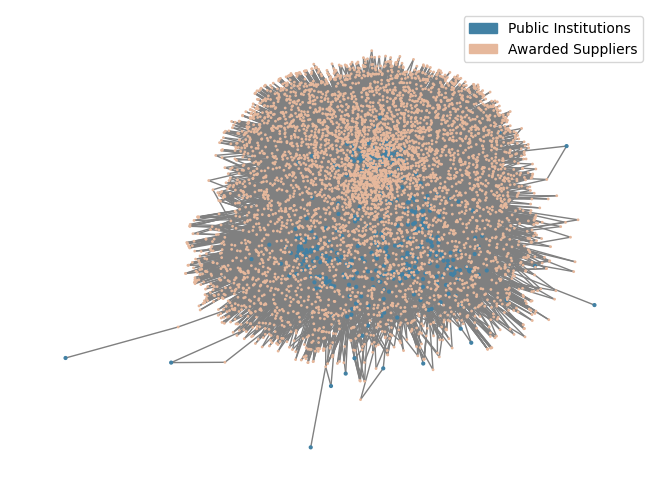

In [279]:
#Plot - Graph with only suppliers with at least two edges

# Create a bipartite graph
G = nx.Graph()

nodes = list(range(len(node2idx2)))

# Example bipartite node sets
nodes_set_A = nodes[:institution_1.shape[0]] #instituciones
nodes_set_B = nodes[institution_1.shape[0]:] #proveedores

# Add nodes to the graph with 'bipartite' attribute
G.add_nodes_from(nodes_set_A, bipartite=0)  # bipartite=0 for nodes in set A
G.add_nodes_from(nodes_set_B, bipartite=1)  # bipartite=1 for nodes in set B

# Add edges between nodes in different sets
edges = edges_data2['Edge Rep'].to_list()
G.add_edges_from(edges)

# Create dictionaries to specify node sizes for each partition
node_sizes_A = {node: 4 for node in nodes_set_A}

# Create dictionaries to specify colors for nodes in each partition
node_colors = {node: '#4281A4' for node in nodes_set_A}
node_colors.update({node: '#E6B89C' for node in nodes_set_B})

# Create a dictionary to specify colors for edges
edge_colors = {edge: 'gray' for edge in G.edges()}

# Visualize the bipartite graph
pos = nx.spring_layout(G, seed=42)

# Extract lists of sizes and colors for nodes and edges based on the dictionaries
node_sizes_list = [node_sizes_A.get(node, 1) for node in G.nodes()]
node_colors_list = [node_colors[node] for node in G.nodes()]
edge_colors_list = [edge_colors[edge] for edge in G.edges()]

# Draw the graph with specified node and edge colors
nx.draw(G, pos, node_color=node_colors_list, edge_color=edge_colors_list, node_size=node_sizes_list)

# Create legend patches for node colors
legend_patches = [
    mpatches.Patch(color='#4281A4', label='Public Institutions'),
    mpatches.Patch(color='#E6B89C', label='Awarded Suppliers'),
]

# Add the legend to the plot
plt.legend(handles=legend_patches)

# Display the plot
plt.show()
